In [1]:
%reload_ext autoreload
%autoreload 2
#Custom Files
from DataManager import dataManager
from DataManagerUtil import *
import GCN as GCN
import GCNutil as GCNutil
import GDE as GDE
import GDEutil as GDEutil
import GDEsolvers as GDEsolvers
import MLP as MLP
from Full_model import Integrated_Model
from FigurePlotter import FigurePlotter

#Standard Libraries
# Torch
import torch
import torch.autograd
import torch.nn as nn
import torch.nn.functional as F
#Numpy
import numpy as np

torch.manual_seed(0)

In [2]:
#Loading everything from the dataset
filepath = 'datasets\pat_FR_442.mat' #264 253 620 273
variables = load_patient_data(filepath, verbose = False)

In [3]:
dm = dataManager(variables["X_train"],variables["X_test"],variables["y_train"],variables["y_test"],10**(-4))

--------data manager successfully initialized--------


In [4]:
print(dm)
dm.apply_dvariance_filter(28)
dm.mean_pooling_1d(size = 24, stride = 20, padding = 0)
print(dm)

X_train: shape of(10615, 53, 640)
X_test: shape of(10316, 53, 640)
Y_train: shape of(10615, 1)
Y_test: shape of(10316, 1)
A_train: shape of(53, 53)
A_test: shape of(53, 53)
P_avg_train: shape of(53, 53)
P_avg_test: shape of(53, 53)
--------data successfully filtered (dvariance)--------
X_train: shape of(10615, 28, 31)
X_test: shape of(10316, 28, 31)
Y_train: shape of(10615, 1)
Y_test: shape of(10316, 1)
A_train: shape of(28, 28)
A_test: shape of(28, 28)
P_avg_train: shape of(28, 28)
P_avg_test: shape of(28, 28)


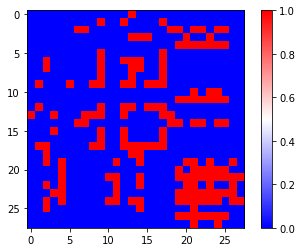

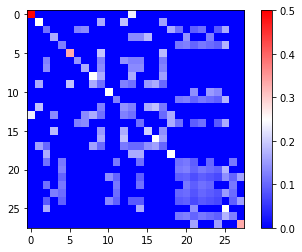

In [5]:
n =3000000#1.3*10**-2
dm.re_threshold(n)
show_heat_map(dm.A_train)
show_heat_map(create_DAD(dm.A_train))
#print(create_DAD(dm.A_train))
Araw =  dm.A_train

In [6]:
#model 1
GCNparameters = {
    'body': dm.X_train.shape[2],
    'M': dm.X_train.shape[0],
    'batch_size': 256,
    'n_layers': 2,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
GDEparameters = {
    'body': dm.X_train.shape[2],
    'solver': GDEsolvers.explicit_RK,
    'solver_params': {
    "t0": 0,
    "t1": 1,
    "N": 5,
    "b_tableau": GDEsolvers.RK4
     },
    'hidden_layers': 1,
    'M': dm.X_train.shape[0],
    'batch_size': 128,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
MLPparametersGCN = {
    'n_layers':2,
    'layer_size_factor':[1,50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}
MLPparametersGDE = {
    'n_layers':2,
    'layer_size_factor':[1, 50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}

  7%|▋         | 3/42 [00:00<00:01, 27.35it/s]

----------Training GCN-----------
device set to cpu


 31%|███       | 13/42 [00:00<00:00, 35.10it/s]

Epoch: 1   Batch: 15 of size 256   Train loss: 647.4487915039062   Valid loss: 648.3518676757812

 60%|█████▉    | 25/42 [00:00<00:00, 41.50it/s]

 71%|███████▏  | 30/42 [00:00<00:00, 43.65it/s]

Epoch: 1   Batch: 36 of size 256   Train loss: 647.8004150390625   Valid loss: 647.1142578125938

  0%|          | 0/42 [00:00<?, ?it/s]

Epoch: 1   Batch: 42 of size 256   Train loss: 646.5090942382812   Valid loss: 0.0.5117187518758
Epoch: 2   Batch: 2 of size 256   Train loss: 646.564697265625   Valid loss: 646.7871093756875

 24%|██▍       | 10/42 [00:00<00:00, 48.86it/s]

Epoch: 2   Batch: 12 of size 256   Train loss: 646.5779418945312   Valid loss: 645.9321289062538

 52%|█████▏    | 22/42 [00:00<00:00, 50.90it/s]

Epoch: 2   Batch: 22 of size 256   Train loss: 644.7116088867188   Valid loss: 644.2766113281258

 67%|██████▋   | 28/42 [00:00<00:00, 51.05it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Epoch: 2   Batch: 42 of size 256   Train loss: 644.6031494140625   Valid loss: 0.075598144531252
Epoch: 3   Batch: 1 of size 256   Train loss: 644.8023071289062   Valid loss: 643.8856201171875

 26%|██▌       | 11/42 [00:00<00:00, 50.48it/s]

 38%|███▊      | 16/42 [00:00<00:00, 49.63it/s]

Epoch: 3   Batch: 21 of size 256   Train loss: 644.0016479492188   Valid loss: 642.1711425781252

 67%|██████▋   | 28/42 [00:00<00:00, 51.46it/s]

Epoch: 3   Batch: 31 of size 256   Train loss: 643.1302490234375   Valid loss: 639.8538208007812

  0%|          | 0/42 [00:00<?, ?it/s]

Epoch: 3   Batch: 42 of size 256   Train loss: 642.539306640625   Valid loss: 0.09.4451904296875
Epoch: 4   Batch: 

 14%|█▍        | 6/42 [00:00<00:00, 55.19it/s]

Epoch: 4   Batch: 10 of size 256   Train loss: 642.4127197265625   Valid loss: 639.1721801757812

 40%|████      | 17/42 [00:00<00:00, 51.72it/s]

Epoch: 4   Batch: 19 of size 256   Train loss: 642.4237060546875   Valid loss: 638.1541748046875

 67%|██████▋   | 28/42 [00:00<00:00, 50.83it/s]

Epoch: 4   Batch: 28 of size 256   Train loss: 641.9708251953125   Valid loss: 638.7190551757812

 81%|████████  | 34/42 [00:00<00:00, 51.01it/s]

 14%|█▍        | 6/42 [00:00<00:00, 55.70it/s]

Epoch: 4   Batch: 42 of size 256   Train loss: 642.0665283203125   Valid loss: 0.0.55908203125
Epoch: 5   Batch: 8 of size 256   Train loss: 640.8763427734375   Valid loss: 637.5100708007812

 43%|████▎     | 18/42 [00:00<00:00, 54.98it/s]

 69%|██████▉   | 29/42 [00:00<00:00, 52.36it/s]

 95%|█████████▌| 40/42 [00:00<00:00, 51.88it/s]

  1%|          | 1/83 [00:00<00:11,  7.06it/s]

Epoch: 5   Batch: 42 of size 256   Train loss: 640.7865600585938   Valid loss: 0.0.8177490234375
----------Training Ends-----------
----------Training GDE-----------
device set to cpu


  4%|▎         | 3/83 [00:00<00:11,  7.19it/s]

  6%|▌         | 5/83 [00:00<00:11,  6.97it/s]

  8%|▊         | 7/83 [00:01<00:11,  6.80it/s]

 11%|█         | 9/83 [00:01<00:10,  6.93it/s]

 13%|█▎        | 11/83 [00:01<00:10,  7.14it/s]

 16%|█▌        | 13/83 [00:01<00:09,  7.09it/s]

 18%|█▊        | 15/83 [00:02<00:09,  7.03it/s]

 20%|██        | 17/83 [00:02<00:09,  7.04it/s]

 23%|██▎       | 19/83 [00:02<00:09,  7.08it/s]

 25%|██▌       | 21/83 [00:02<00:08,  7.00it/s]

 28%|██▊       | 23/83 [00:03<00:08,  7.08it/s]

 30%|███       | 25/83 [00:03<00:08,  7.22it/s]

 33%|███▎      | 27/83 [00:03<00:08,  6.93it/s]

 35%|███▍      | 29/83 [00:04<00:07,  7.09it/s]

 37%|███▋      | 31/83 [00:04<00:07,  7.23it/s]

 40%|███▉      | 33/83 [00:04<00:06,  7.29it/s]

 42%|████▏     | 35/83 [00:04<00:06,  6.96it/s]

 45%|████▍     | 37/83 [00:05<00:06,  7.12it/s]

 47%|████▋     | 39/83 [00:05<00:06,  7.17it/s]

 49%|████▉     | 41/83 [00:05<00:05,  7.04it/s]

 52%|█████▏    | 43/83 [00:06<00:05,  7.14it/s]

 54%|█████▍    | 45/83 [00:06<00:05,  7.19it/s]

 57%|█████▋    | 47/83 [00:06<00:05,  7.06it/s]

 59%|█████▉    | 49/83 [00:06<00:04,  7.10it/s]

 61%|██████▏   | 51/83 [00:07<00:04,  7.09it/s]

 64%|██████▍   | 53/83 [00:07<00:04,  7.13it/s]

 66%|██████▋   | 55/83 [00:07<00:04,  6.93it/s]

 69%|██████▊   | 57/83 [00:08<00:03,  7.14it/s]

 71%|███████   | 59/83 [00:08<00:03,  7.25it/s]

 73%|███████▎  | 61/83 [00:08<00:03,  7.33it/s]

 76%|███████▌  | 63/83 [00:08<00:02,  7.12it/s]

 78%|███████▊  | 65/83 [00:09<00:02,  7.12it/s]

 81%|████████  | 67/83 [00:09<00:02,  7.25it/s]

 83%|████████▎ | 69/83 [00:09<00:01,  7.26it/s]

 86%|████████▌ | 71/83 [00:09<00:01,  7.21it/s]

 88%|████████▊ | 73/83 [00:10<00:01,  7.16it/s]

 90%|█████████ | 75/83 [00:10<00:01,  7.30it/s]

 93%|█████████▎| 77/83 [00:10<00:00,  7.20it/s]

 95%|█████████▌| 79/83 [00:11<00:00,  7.19it/s]

 98%|█████████▊| 81/83 [00:11<00:00,  7.26it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

Epoch: 1   Batch: 83 of size 128   Train loss: 641.076171875   Valid loss: 0.00.0


  2%|▏         | 2/83 [00:00<00:11,  7.20it/s]

  5%|▍         | 4/83 [00:00<00:10,  7.32it/s]

  7%|▋         | 6/83 [00:00<00:10,  7.18it/s]

 10%|▉         | 8/83 [00:01<00:10,  7.28it/s]

 12%|█▏        | 10/83 [00:01<00:10,  7.28it/s]

 14%|█▍        | 12/83 [00:01<00:09,  7.31it/s]

 17%|█▋        | 14/83 [00:01<00:09,  7.41it/s]

 19%|█▉        | 16/83 [00:02<00:09,  7.34it/s]

 22%|██▏       | 18/83 [00:02<00:09,  7.20it/s]

 24%|██▍       | 20/83 [00:02<00:08,  7.32it/s]

 27%|██▋       | 22/83 [00:03<00:08,  7.29it/s]

 29%|██▉       | 24/83 [00:03<00:08,  7.09it/s]

 31%|███▏      | 26/83 [00:03<00:07,  7.30it/s]

 34%|███▎      | 28/83 [00:03<00:07,  7.36it/s]

 36%|███▌      | 30/83 [00:04<00:07,  7.20it/s]

 39%|███▊      | 32/83 [00:04<00:07,  7.18it/s]

 41%|████      | 34/83 [00:04<00:06,  7.16it/s]

 43%|████▎     | 36/83 [00:04<00:06,  7.30it/s]

 46%|████▌     | 38/83 [00:05<00:06,  6.90it/s]

 48%|████▊     | 40/83 [00:05<00:06,  6.85it/s]

 51%|█████     | 42/83 [00:05<00:05,  7.12it/s]

 53%|█████▎    | 44/83 [00:06<00:05,  7.22it/s]

 55%|█████▌    | 46/83 [00:06<00:05,  7.00it/s]

 58%|█████▊    | 48/83 [00:06<00:04,  7.24it/s]

 60%|██████    | 50/83 [00:06<00:04,  7.42it/s]

 63%|██████▎   | 52/83 [00:07<00:04,  7.05it/s]

 65%|██████▌   | 54/83 [00:07<00:04,  6.94it/s]

 67%|██████▋   | 56/83 [00:07<00:03,  7.11it/s]

 70%|██████▉   | 58/83 [00:08<00:03,  7.29it/s]

 72%|███████▏  | 60/83 [00:08<00:03,  7.09it/s]

 75%|███████▍  | 62/83 [00:08<00:02,  7.13it/s]

 77%|███████▋  | 64/83 [00:08<00:02,  7.29it/s]

 80%|███████▉  | 66/83 [00:09<00:02,  7.22it/s]

 82%|████████▏ | 68/83 [00:09<00:02,  7.30it/s]

 84%|████████▍ | 70/83 [00:09<00:01,  7.34it/s]

 87%|████████▋ | 72/83 [00:09<00:01,  7.31it/s]

 89%|████████▉ | 74/83 [00:10<00:01,  7.16it/s]

 92%|█████████▏| 76/83 [00:10<00:00,  7.01it/s]

 94%|█████████▍| 78/83 [00:10<00:00,  7.07it/s]

 96%|█████████▋| 80/83 [00:11<00:00,  7.14it/s]

 99%|█████████▉| 82/83 [00:11<00:00,  7.32it/s]

  1%|          | 1/83 [00:00<00:10,  7.48it/s]

Epoch: 2   Batch: 83 of size 128   Train loss: 635.005615234375   Valid loss: 0.0


  4%|▎         | 3/83 [00:00<00:11,  7.25it/s]

  6%|▌         | 5/83 [00:00<00:10,  7.13it/s]

  8%|▊         | 7/83 [00:00<00:10,  7.06it/s]

 11%|█         | 9/83 [00:01<00:10,  7.15it/s]

 13%|█▎        | 11/83 [00:01<00:10,  7.01it/s]

 16%|█▌        | 13/83 [00:01<00:10,  6.74it/s]

 18%|█▊        | 15/83 [00:02<00:09,  7.00it/s]

 20%|██        | 17/83 [00:02<00:09,  7.11it/s]

 23%|██▎       | 19/83 [00:02<00:09,  6.87it/s]

 25%|██▌       | 21/83 [00:03<00:09,  6.88it/s]

 28%|██▊       | 23/83 [00:03<00:08,  6.87it/s]

 30%|███       | 25/83 [00:03<00:08,  7.07it/s]

 33%|███▎      | 27/83 [00:03<00:08,  6.81it/s]

 35%|███▍      | 29/83 [00:04<00:07,  6.95it/s]

 37%|███▋      | 31/83 [00:04<00:07,  7.10it/s]

 40%|███▉      | 33/83 [00:04<00:07,  6.88it/s]

 42%|████▏     | 35/83 [00:05<00:06,  6.97it/s]

 45%|████▍     | 37/83 [00:05<00:06,  6.98it/s]

 47%|████▋     | 39/83 [00:05<00:06,  7.16it/s]

 49%|████▉     | 41/83 [00:05<00:06,  6.90it/s]

 52%|█████▏    | 43/83 [00:06<00:05,  7.13it/s]

 54%|█████▍    | 45/83 [00:06<00:05,  7.13it/s]

 57%|█████▋    | 47/83 [00:06<00:05,  7.06it/s]

 59%|█████▉    | 49/83 [00:06<00:04,  7.11it/s]

 61%|██████▏   | 51/83 [00:07<00:04,  7.16it/s]

 64%|██████▍   | 53/83 [00:07<00:04,  7.09it/s]

 66%|██████▋   | 55/83 [00:07<00:04,  6.92it/s]

 69%|██████▊   | 57/83 [00:08<00:03,  6.99it/s]

 71%|███████   | 59/83 [00:08<00:03,  7.10it/s]

 73%|███████▎  | 61/83 [00:08<00:03,  6.91it/s]

 76%|███████▌  | 63/83 [00:08<00:02,  6.90it/s]

 78%|███████▊  | 65/83 [00:09<00:02,  7.05it/s]

 81%|████████  | 67/83 [00:09<00:02,  6.97it/s]

 83%|████████▎ | 69/83 [00:09<00:02,  6.58it/s]

 86%|████████▌ | 71/83 [00:10<00:01,  6.58it/s]

 88%|████████▊ | 73/83 [00:10<00:01,  6.66it/s]

 90%|█████████ | 75/83 [00:10<00:01,  6.65it/s]

 93%|█████████▎| 77/83 [00:11<00:00,  6.85it/s]

 95%|█████████▌| 79/83 [00:11<00:00,  7.00it/s]

 98%|█████████▊| 81/83 [00:11<00:00,  6.91it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

Epoch: 3   Batch: 83 of size 128   Train loss: 624.179931640625   Valid loss: 0.00


  2%|▏         | 2/83 [00:00<00:11,  6.94it/s]

  5%|▍         | 4/83 [00:00<00:11,  6.84it/s]

  7%|▋         | 6/83 [00:00<00:12,  6.39it/s]

 10%|▉         | 8/83 [00:01<00:11,  6.50it/s]

 12%|█▏        | 10/83 [00:01<00:10,  6.77it/s]

 14%|█▍        | 12/83 [00:01<00:10,  6.73it/s]

 17%|█▋        | 14/83 [00:02<00:10,  6.87it/s]

 19%|█▉        | 16/83 [00:02<00:09,  6.91it/s]

 22%|██▏       | 18/83 [00:02<00:09,  7.08it/s]

 24%|██▍       | 20/83 [00:02<00:09,  6.94it/s]

 27%|██▋       | 22/83 [00:03<00:08,  6.99it/s]

 29%|██▉       | 24/83 [00:03<00:08,  6.99it/s]

 31%|███▏      | 26/83 [00:03<00:08,  6.99it/s]

 34%|███▎      | 28/83 [00:04<00:07,  7.10it/s]

 36%|███▌      | 30/83 [00:04<00:07,  7.14it/s]

 39%|███▊      | 32/83 [00:04<00:07,  7.12it/s]

 41%|████      | 34/83 [00:04<00:07,  6.84it/s]

 43%|████▎     | 36/83 [00:05<00:06,  6.93it/s]

 46%|████▌     | 38/83 [00:05<00:06,  7.06it/s]

 48%|████▊     | 40/83 [00:05<00:06,  6.91it/s]

 51%|█████     | 42/83 [00:06<00:05,  6.96it/s]

 53%|█████▎    | 44/83 [00:06<00:05,  7.09it/s]

 55%|█████▌    | 46/83 [00:06<00:05,  6.93it/s]

 58%|█████▊    | 48/83 [00:06<00:05,  6.88it/s]

 60%|██████    | 50/83 [00:07<00:04,  7.02it/s]

 63%|██████▎   | 52/83 [00:07<00:04,  7.10it/s]

 65%|██████▌   | 54/83 [00:07<00:04,  7.09it/s]

 67%|██████▋   | 56/83 [00:08<00:03,  7.04it/s]

 70%|██████▉   | 58/83 [00:08<00:03,  7.21it/s]

 72%|███████▏  | 60/83 [00:08<00:03,  7.09it/s]

 75%|███████▍  | 62/83 [00:08<00:03,  6.82it/s]

 77%|███████▋  | 64/83 [00:09<00:02,  7.03it/s]

 80%|███████▉  | 66/83 [00:09<00:02,  7.01it/s]

 82%|████████▏ | 68/83 [00:09<00:02,  6.93it/s]

 84%|████████▍ | 70/83 [00:10<00:01,  7.01it/s]

 87%|████████▋ | 72/83 [00:10<00:01,  7.07it/s]

 89%|████████▉ | 74/83 [00:10<00:01,  7.05it/s]

 92%|█████████▏| 76/83 [00:10<00:01,  6.79it/s]

 94%|█████████▍| 78/83 [00:11<00:00,  7.12it/s]

 96%|█████████▋| 80/83 [00:11<00:00,  7.16it/s]

 99%|█████████▉| 82/83 [00:11<00:00,  7.28it/s]

  1%|          | 1/83 [00:00<00:11,  7.43it/s]

Epoch: 4   Batch: 83 of size 128   Train loss: 611.585205078125   Valid loss: 0.0


  4%|▎         | 3/83 [00:00<00:10,  7.28it/s]

  6%|▌         | 5/83 [00:00<00:10,  7.10it/s]

  8%|▊         | 7/83 [00:00<00:10,  6.95it/s]

 11%|█         | 9/83 [00:01<00:10,  7.01it/s]

 13%|█▎        | 11/83 [00:01<00:10,  7.02it/s]

 16%|█▌        | 13/83 [00:01<00:10,  6.87it/s]

 18%|█▊        | 15/83 [00:02<00:10,  6.76it/s]

 20%|██        | 17/83 [00:02<00:09,  6.78it/s]

 23%|██▎       | 19/83 [00:02<00:09,  6.59it/s]

 25%|██▌       | 21/83 [00:03<00:09,  6.21it/s]

 28%|██▊       | 23/83 [00:03<00:10,  5.96it/s]

 30%|███       | 25/83 [00:03<00:09,  5.94it/s]

 33%|███▎      | 27/83 [00:04<00:08,  6.27it/s]

 35%|███▍      | 29/83 [00:04<00:08,  6.59it/s]

 37%|███▋      | 31/83 [00:04<00:07,  6.80it/s]

 40%|███▉      | 33/83 [00:05<00:07,  6.34it/s]

 42%|████▏     | 35/83 [00:05<00:07,  6.33it/s]

 45%|████▍     | 37/83 [00:05<00:07,  6.26it/s]

 47%|████▋     | 39/83 [00:05<00:06,  6.43it/s]

 49%|████▉     | 41/83 [00:06<00:06,  6.56it/s]

 52%|█████▏    | 43/83 [00:06<00:05,  6.77it/s]

 54%|█████▍    | 45/83 [00:06<00:05,  6.61it/s]

 57%|█████▋    | 47/83 [00:07<00:05,  6.62it/s]

 59%|█████▉    | 49/83 [00:07<00:05,  6.61it/s]

 61%|██████▏   | 51/83 [00:07<00:04,  6.81it/s]

 64%|██████▍   | 53/83 [00:08<00:04,  6.64it/s]

 66%|██████▋   | 55/83 [00:08<00:04,  6.71it/s]

 69%|██████▊   | 57/83 [00:08<00:03,  6.90it/s]

 71%|███████   | 59/83 [00:08<00:03,  6.78it/s]

 73%|███████▎  | 61/83 [00:09<00:03,  6.78it/s]

 76%|███████▌  | 63/83 [00:09<00:02,  6.89it/s]

 78%|███████▊  | 65/83 [00:09<00:02,  6.81it/s]

 81%|████████  | 67/83 [00:10<00:02,  6.73it/s]

 83%|████████▎ | 69/83 [00:10<00:02,  6.94it/s]

 86%|████████▌ | 71/83 [00:10<00:01,  6.91it/s]

 88%|████████▊ | 73/83 [00:10<00:01,  6.71it/s]

 90%|█████████ | 75/83 [00:11<00:01,  6.68it/s]

 93%|█████████▎| 77/83 [00:11<00:00,  6.94it/s]

 95%|█████████▌| 79/83 [00:11<00:00,  6.68it/s]

 98%|█████████▊| 81/83 [00:12<00:00,  6.80it/s]

100%|██████████| 83/83 [00:12<00:00,  6.69it/s]

Epoch: 5   Batch: 83 of size 128   Train loss: 599.99365234375   Valid loss: 0.0.0
----------Training Ends-----------


Average Ictal and Non-Ictal Simularity Matrix for GCN
Average ictal


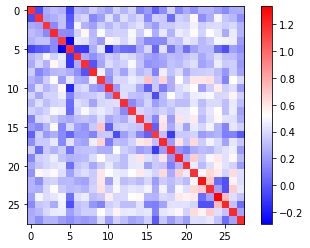

Average Non-Ictal


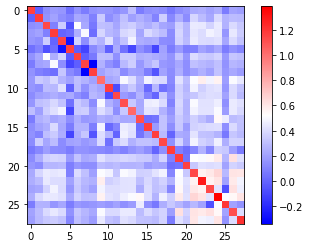

Average Ictal and Non-Ictal Simularity Matrix for GDE
Average ictal


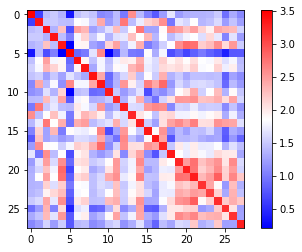

Average Non-Ictal


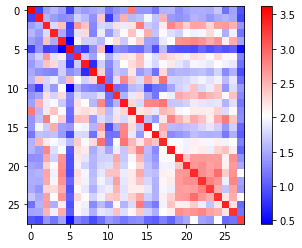

Sample Ictal and Non-Ictal Simularity Matrix for GCN
sample ictal


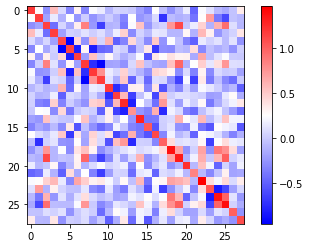

sample Non-Ictal


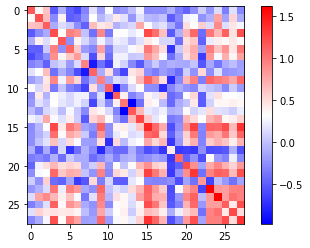

Sample Ictal and Non-Ictal Simularity Matrix for GDE
sample ictal


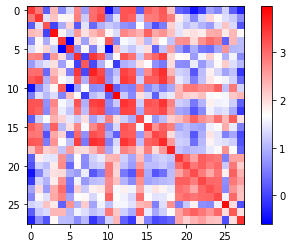

sample Non-Ictal


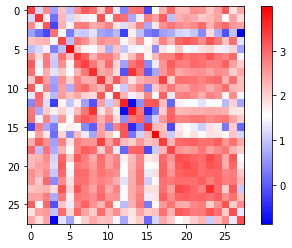

----------Training MLP-----------
0.664 ----------saved-----------
0.711 ----------saved-----------
0.725 ----------saved-----------
0.742 ----------saved-----------
0.756 ----------saved-----------
0.766 ----------saved-----------
0.775 ----------saved-----------
0.783 ----------saved-----------
0.786 ----------saved-----------
0.791 ----------saved-----------
0.798 ----------saved-----------
0.805 ----------saved-----------
0.815 ----------saved-----------
0.817 ----------saved-----------
0.819 ----------saved-----------
0.82 ----------saved-----------
0.822 ----------saved-----------
0.827 ----------saved-----------
0.83 ----------saved-----------
0.83 ----------saved-----------
0.831 ----------saved-----------
0.833 ----------saved-----------
0.836 ----------saved-----------
0.843 ----------saved-----------
----------------------------------
0.569 ----------saved-----------
0.593 ----------saved-----------
0.625 ----------saved-----------
0.643 ----------saved-----------
0.645 ----

In [7]:
M1 = Integrated_Model(GCNparameters, GDEparameters, MLPparametersGCN, MLPparametersGDE, dm, create_DAD(Araw))

In [26]:
FP = FigurePlotter('P442', 'Figures/Figure Patient 442')

<Figure size 432x288 with 0 Axes>

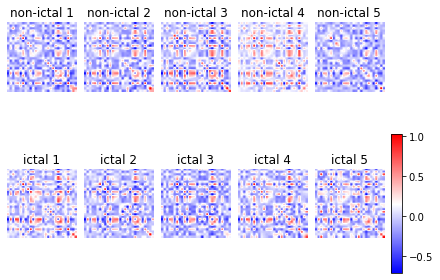

<Figure size 432x288 with 0 Axes>

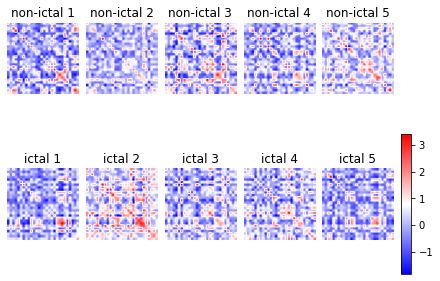

In [27]:
FP.sequential_plot(M1, dm, Araw, 'model_1', i=15)

<Figure size 432x288 with 0 Axes>

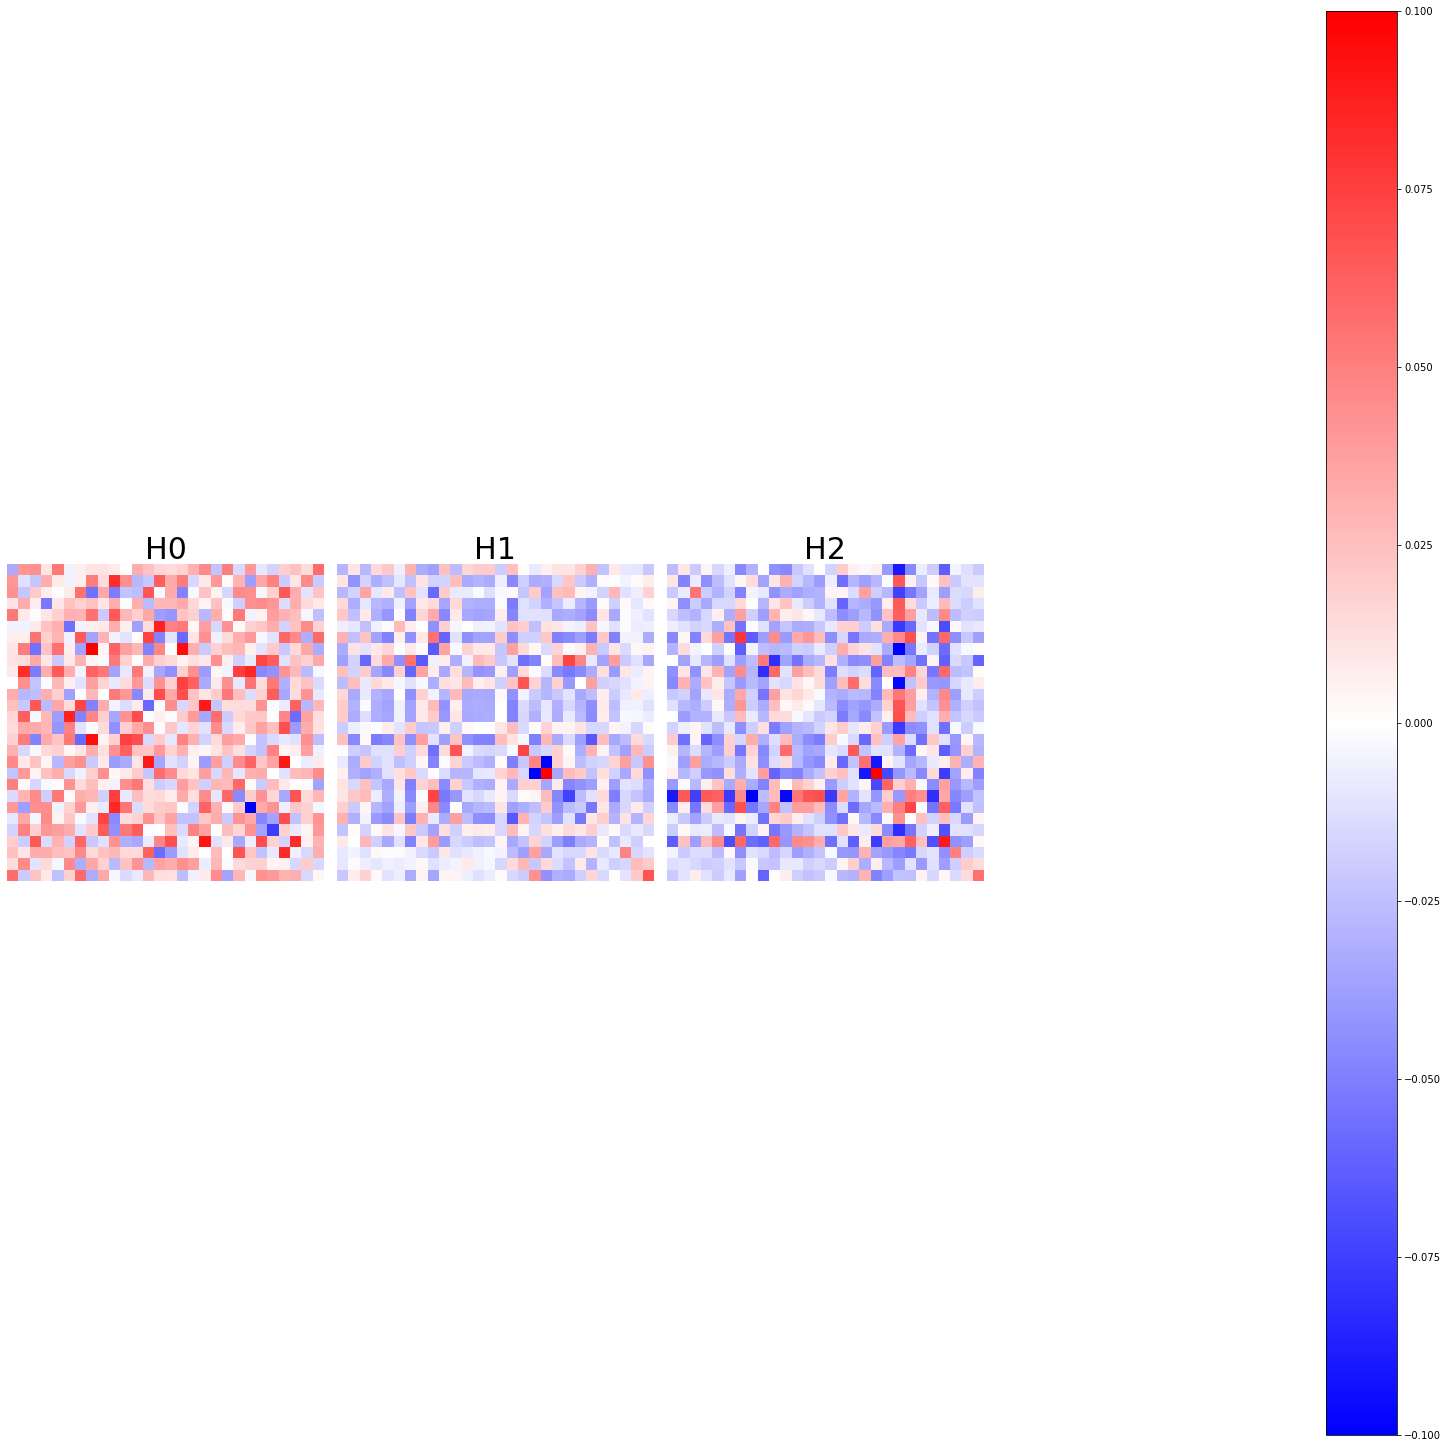

<Figure size 432x288 with 0 Axes>

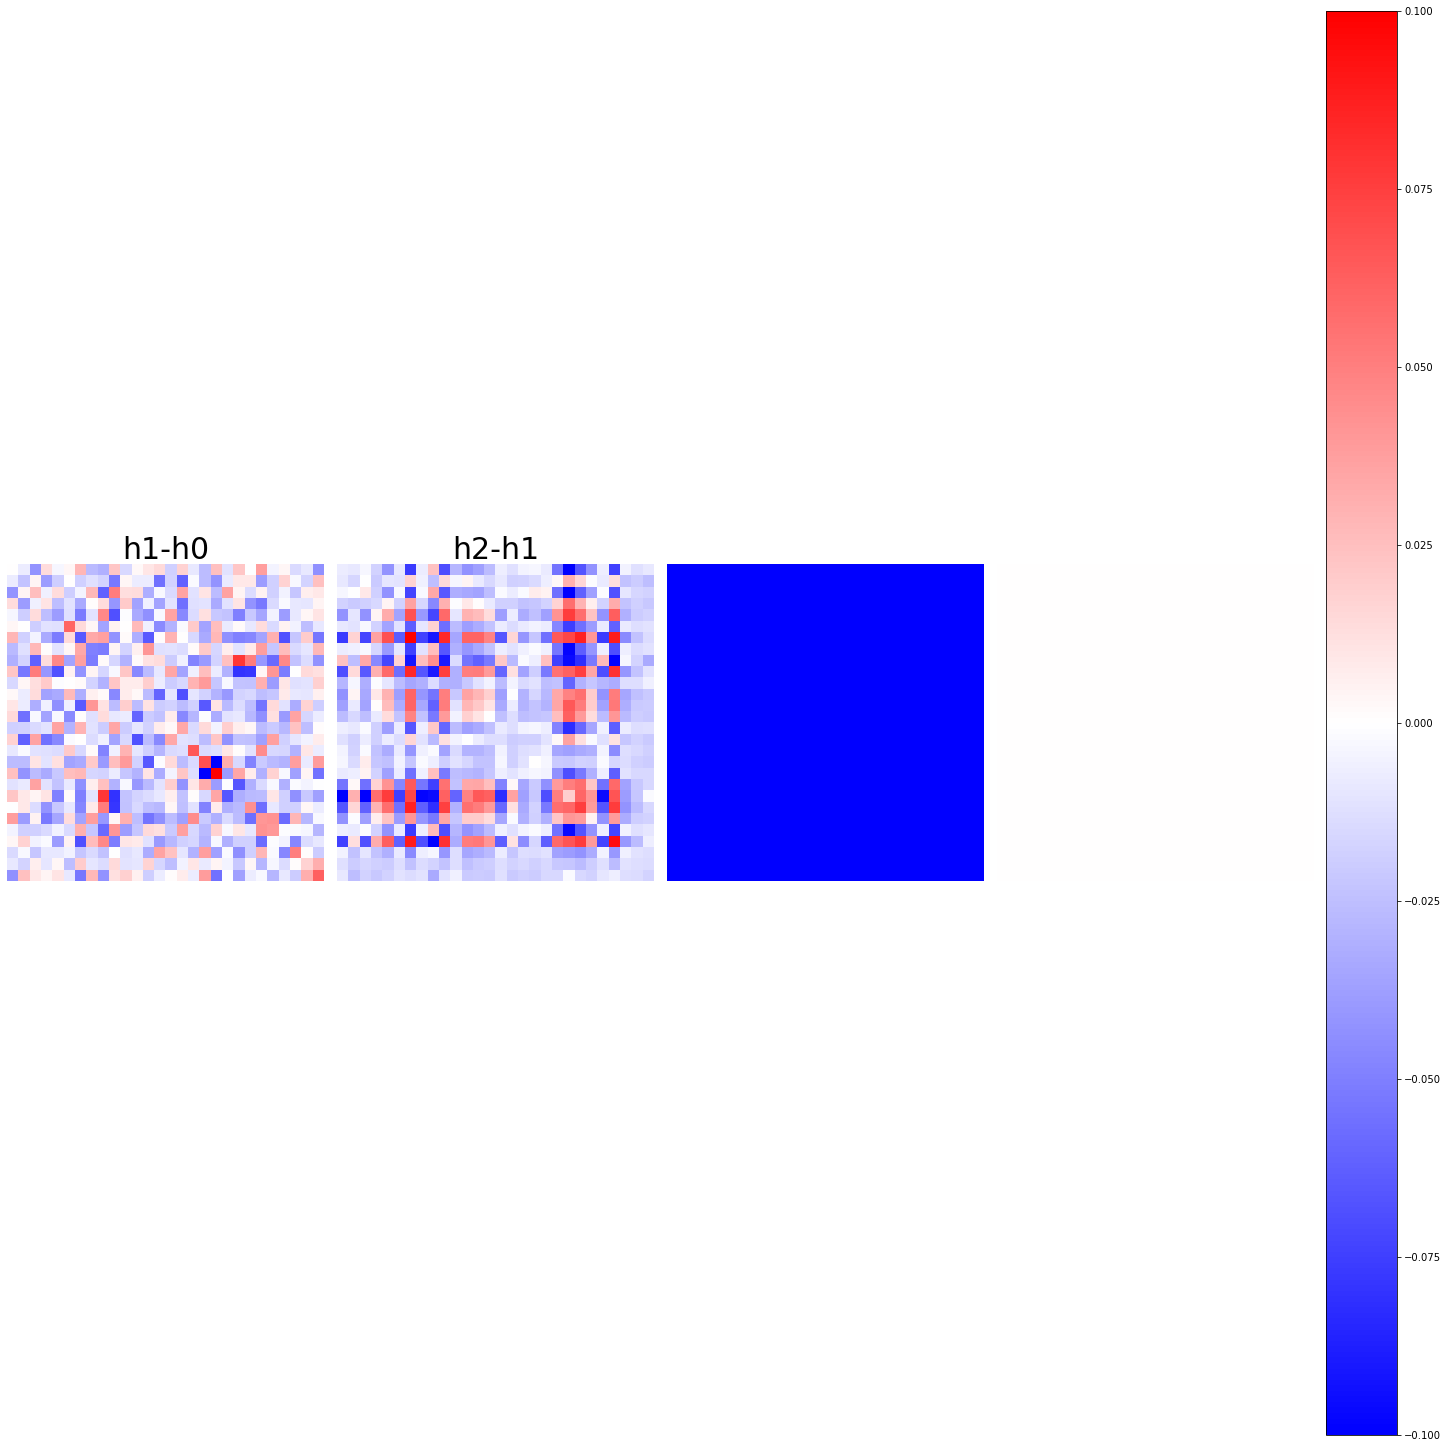

<Figure size 432x288 with 0 Axes>

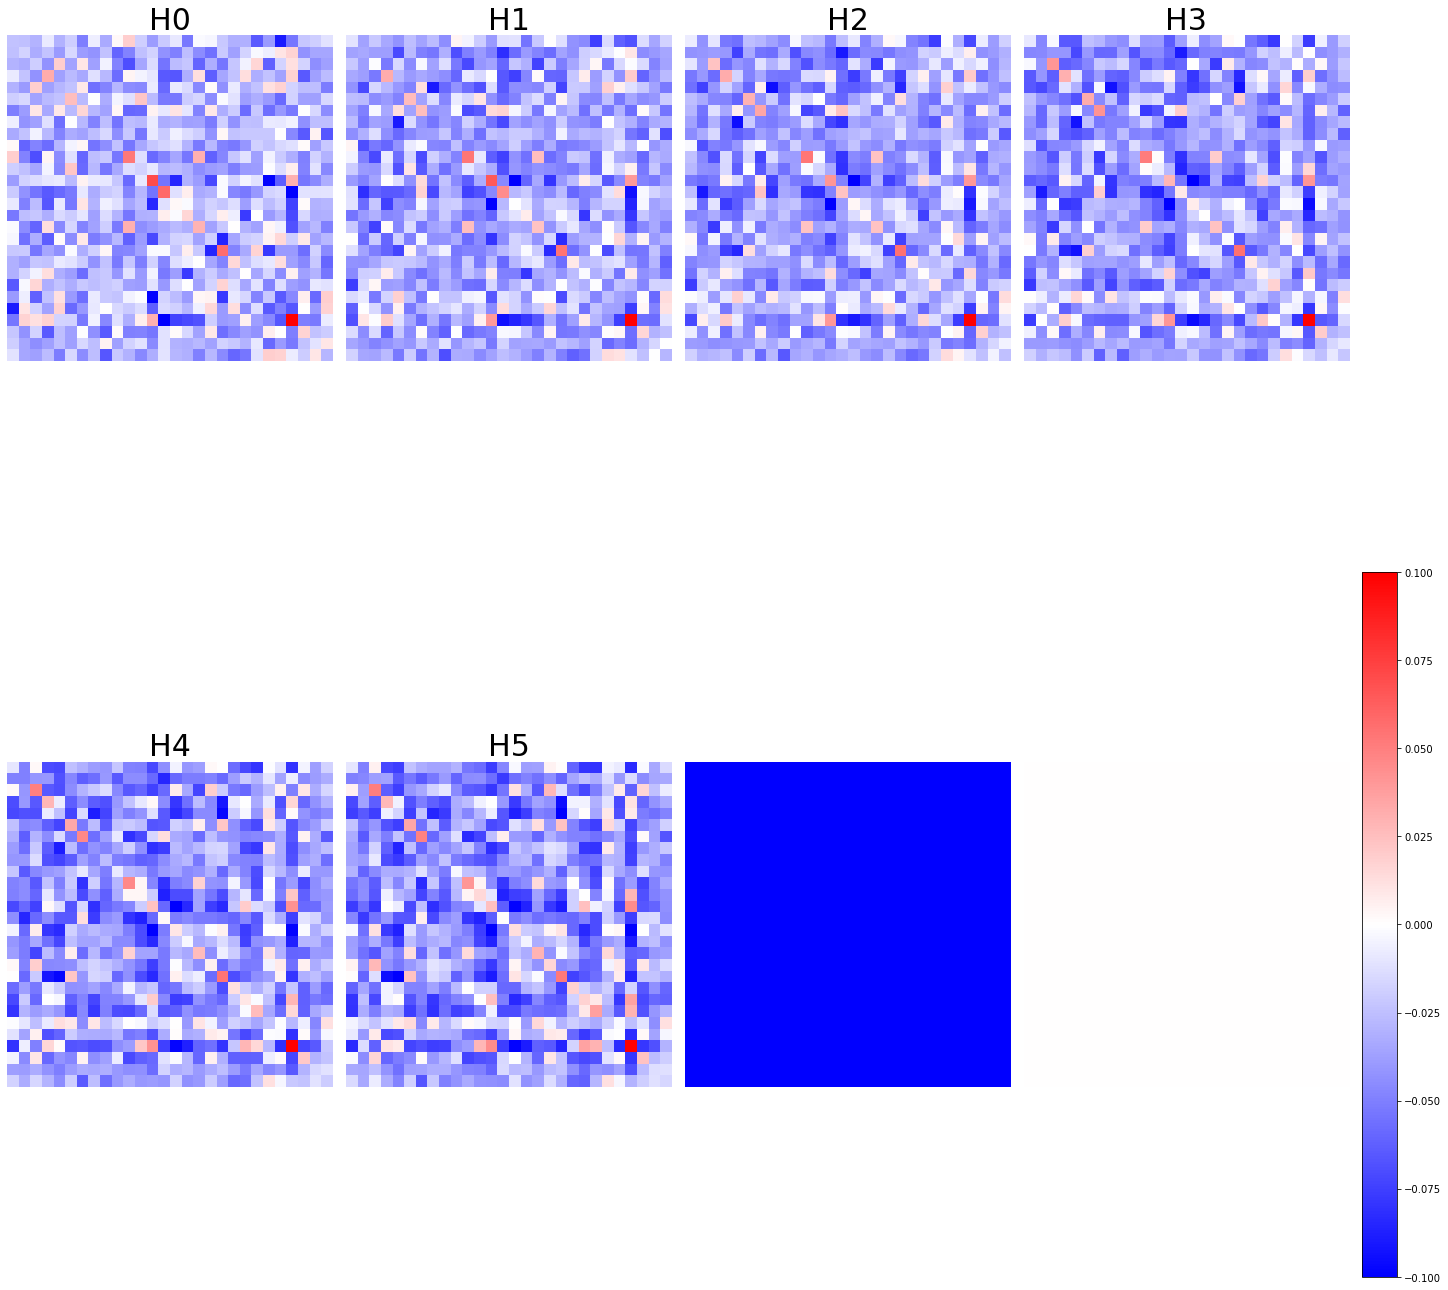

<Figure size 432x288 with 0 Axes>

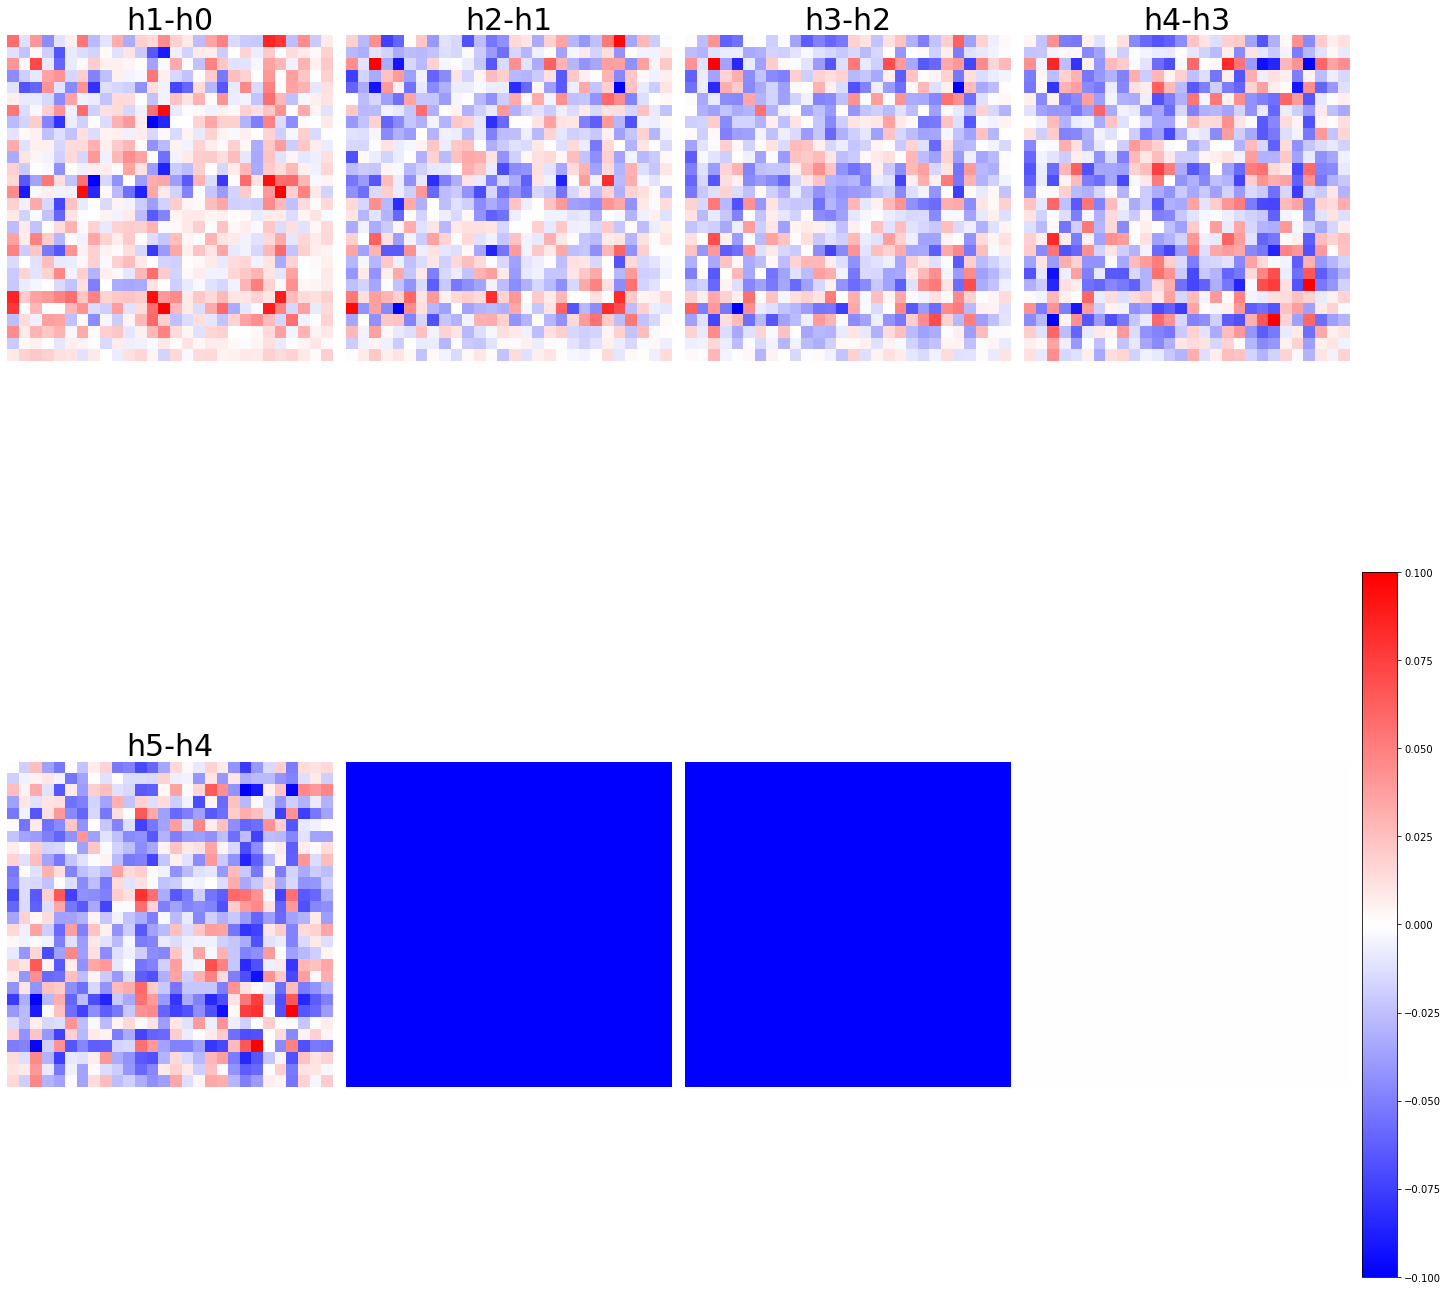

In [28]:
FP.sim_progression(M1, dm, Araw, 'model_1')

In [29]:
#model 2
GCNparameters = {
    'body': dm.X_train.shape[2],
    'M': dm.X_train.shape[0],
    'batch_size': 256,
    'n_layers': 1,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
GDEparameters = {
    'body': dm.X_train.shape[2],
    'solver': GDEsolvers.explicit_RK,
    'solver_params': {
    "t0": 0,
    "t1": 1,
    "N": 5,
    "b_tableau": GDEsolvers.EF
     },
    'hidden_layers': 1,
    'M': dm.X_train.shape[0],
    'batch_size': 128,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
MLPparametersGCN = {
    'n_layers':2,
    'layer_size_factor':[1,50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}
MLPparametersGDE = {
    'n_layers':2,
    'layer_size_factor':[1, 50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}

 50%|█████     | 6/12 [00:00<00:00, 57.85it/s]

----------Training GCN-----------
device set to cpu


100%|██████████| 12/12 [00:00<00:00, 67.78it/s]

Epoch: 1   Batch: 12 of size 256   Train loss: 628.5001831054688   Valid loss: 628.6893920898438



  0%|          | 0/12 [00:00<?, ?it/s]


Epoch: 3   Batch: 12 of size 256   Train loss: 623.055419921875   Valid loss: 622.66619873046882
Epoch:

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 4   Batch: 12 of size 256   Train loss: 620.3899536132812   Valid loss: 619.5332031253125
Epoch:

 58%|█████▊    | 7/12 [00:00<00:00, 63.23it/s]

Epoch: 5   Batch: 12 of size 256   Train loss: 618.49267578125   Valid loss: 617.23168945312525

 17%|█▋        | 4/24 [00:00<00:00, 32.61it/s]

617.703369140625   Valid loss: 617.1741943359375
----------Training Ends-----------
----------Training GDE-----------
device set to cpu


 50%|█████     | 12/24 [00:00<00:00, 32.04it/s]

Epoch: 1   Batch: 13 of size 128   Train loss: 625.2852172851562   Valid loss: 625.2675170898438

 67%|██████▋   | 16/24 [00:00<00:00, 31.83it/s]

Epoch: 1   Batch: 19 of size 128   Train loss: 622.64794921875   Valid loss:22.17004394531258755

  0%|          | 0/24 [00:00<?, ?it/s]

Epoch: 1   Batch: 24 of size 128   Train loss: 620.6309204101562   Valid loss: 619.3464965820312
Epoch: 2   Batch: 1 of size 128   Train loss: 620.9843139648438   Valid loss: 619.1102905273438

 17%|█▋        | 4/24 [00:00<00:00, 31.83it/s]

Epoch: 2   Batch: 7 of size 128   Train loss: 618.523193359375   Valid loss: 617.34570312528125

 50%|█████     | 12/24 [00:00<00:00, 32.40it/s]

Epoch: 2   Batch: 13 of size 128   Train loss: 616.6151123046875   Valid loss: 615.2507324218752

 67%|██████▋   | 16/24 [00:00<00:00, 32.31it/s]

Epoch: 2   Batch: 19 of size 128   Train loss: 615.0718994140625   Valid loss: 613.036865234375

  0%|          | 0/24 [00:00<?, ?it/s]

Epoch: 2   Batch: 24 of size 128   Train loss: 615.9896240234375   Valid loss: 610.1944580078125


 33%|███▎      | 8/24 [00:00<00:00, 32.62it/s]

Epoch: 3   Batch: 10 of size 128   Train loss: 611.02978515625   Valid loss:: 607.7248535156255

 67%|██████▋   | 16/24 [00:00<00:00, 32.59it/s]

 83%|████████▎ | 20/24 [00:00<00:00, 32.71it/s]

Epoch: 3   Batch: 23 of size 128   Train loss: 606.579833984375   Valid loss: 601.76989746093758

 17%|█▋        | 4/24 [00:00<00:00, 33.15it/s]

 3   Batch: 24 of size 128   Train loss: 604.0994873046875   Valid loss: 600.853271484375
Epoch: 4   Batch: 5 of size 128   Train loss: 604.5672607421875   Valid loss: 599.5578613281252

 33%|███▎      | 8/24 [00:00<00:00, 32.74it/s]

Epoch: 4   Batch: 11 of size 128   Train loss: 600.9384155273438   Valid loss: 594.0386352539062

 67%|██████▋   | 16/24 [00:00<00:00, 32.51it/s]

Epoch: 4   Batch: 17 of size 128   Train loss: 599.070068359375   Valid loss: 592.41320800781258

  0%|          | 0/24 [00:00<?, ?it/s]

Epoch: 4   Batch: 24 of size 128   Train loss: 595.4688110351562   Valid loss: 586.9605102539062


 17%|█▋        | 4/24 [00:00<00:00, 31.58it/s]

Epoch: 5   Batch: 6 of size 128   Train loss: 593.81982421875   Valid loss: 582.09442138671888

 50%|█████     | 12/24 [00:00<00:00, 31.06it/s]

Epoch: 5   Batch: 12 of size 128   Train loss: 587.2275390625   Valid loss: 580.666503906255188

 67%|██████▋   | 16/24 [00:00<00:00, 31.29it/s]

Epoch: 5   Batch: 19 of size 128   Train loss: 586.031982421875   Valid loss: 575.93316650390625

100%|██████████| 24/24 [00:00<00:00, 32.06it/s]

Epoch: 5   Batch: 24 of size 128   Train loss: 581.0945434570312   Valid loss: 568.6707153320312
----------Training Ends-----------


Average Ictal and Non-Ictal Simularity Matrix for GCN
Average ictal


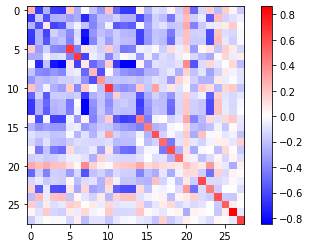

Average Non-Ictal


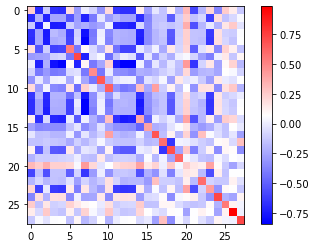

Average Ictal and Non-Ictal Simularity Matrix for GDE
Average ictal


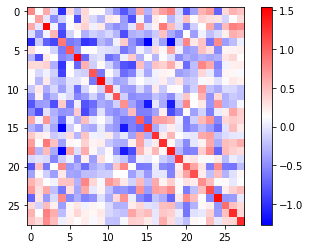

Average Non-Ictal


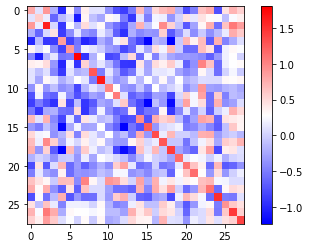

Sample Ictal and Non-Ictal Simularity Matrix for GCN
sample ictal


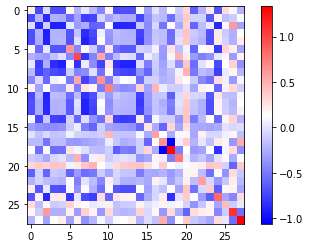

sample Non-Ictal


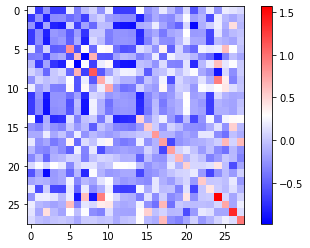

Sample Ictal and Non-Ictal Simularity Matrix for GDE
sample ictal


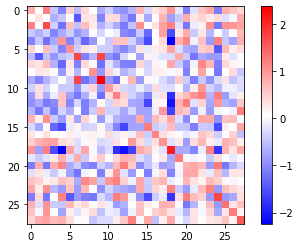

sample Non-Ictal


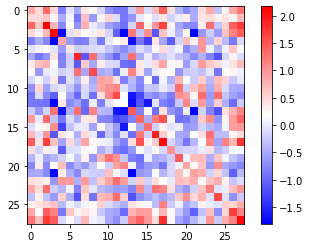

----------Training MLP-----------
0.837 ----------saved-----------
0.855 ----------saved-----------
0.867 ----------saved-----------
0.88 ----------saved-----------
0.888 ----------saved-----------
0.897 ----------saved-----------
0.901 ----------saved-----------
0.904 ----------saved-----------
0.905 ----------saved-----------
0.905 ----------saved-----------
0.906 ----------saved-----------
----------------------------------
0.856 ----------saved-----------
0.87 ----------saved-----------
0.886 ----------saved-----------
0.895 ----------saved-----------
0.901 ----------saved-----------
0.905 ----------saved-----------
0.907 ----------saved-----------
0.909 ----------saved-----------
0.909 ----------saved-----------
----------Training Ends-----------


In [30]:
M2 = Integrated_Model(GCNparameters, GDEparameters, MLPparametersGCN, MLPparametersGDE, dm, create_DAD(Araw))

<Figure size 432x288 with 0 Axes>

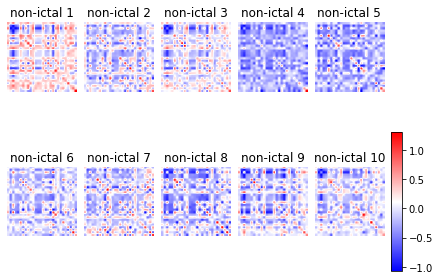

<Figure size 432x288 with 0 Axes>

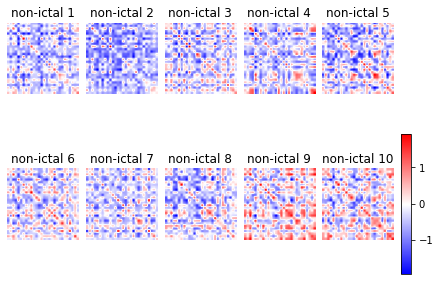

In [31]:
FP.sequential_plot(M2, dm, Araw, 'model_2', i=5)

<Figure size 432x288 with 0 Axes>

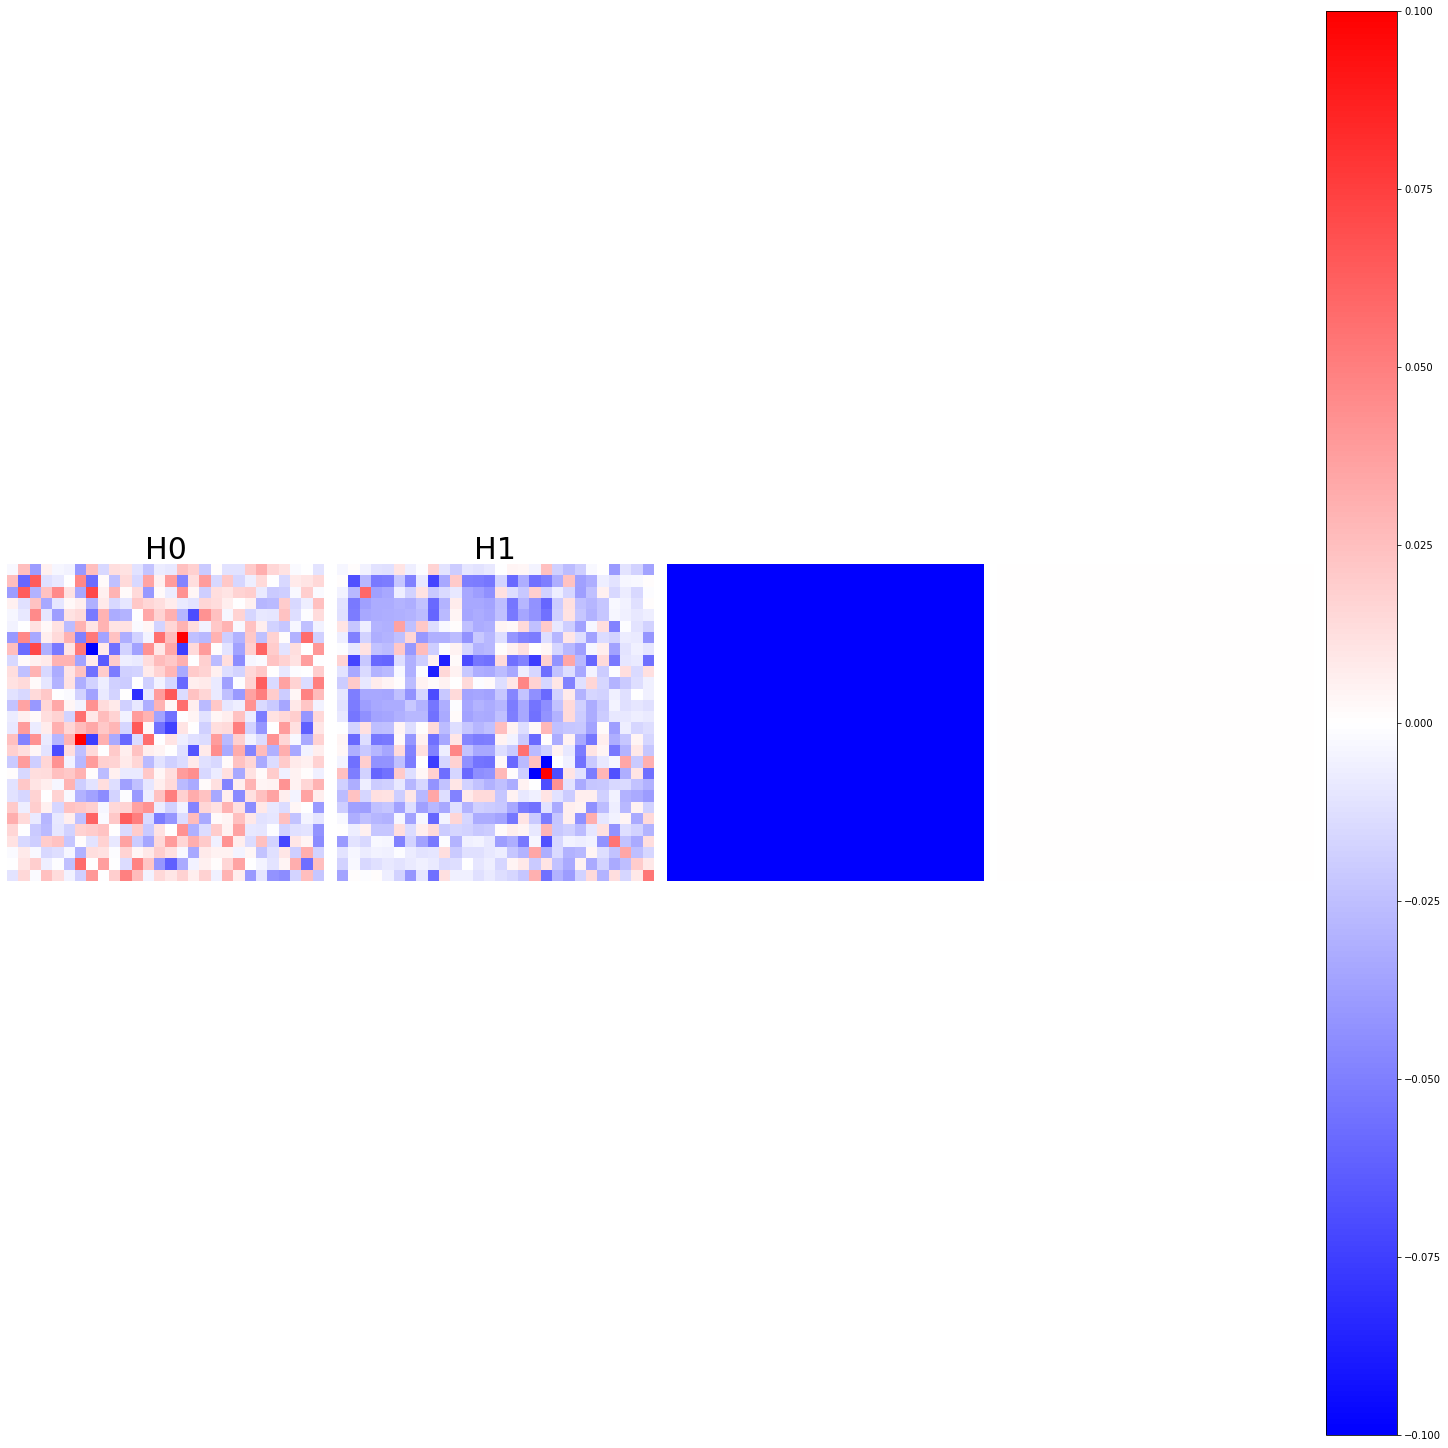

<Figure size 432x288 with 0 Axes>

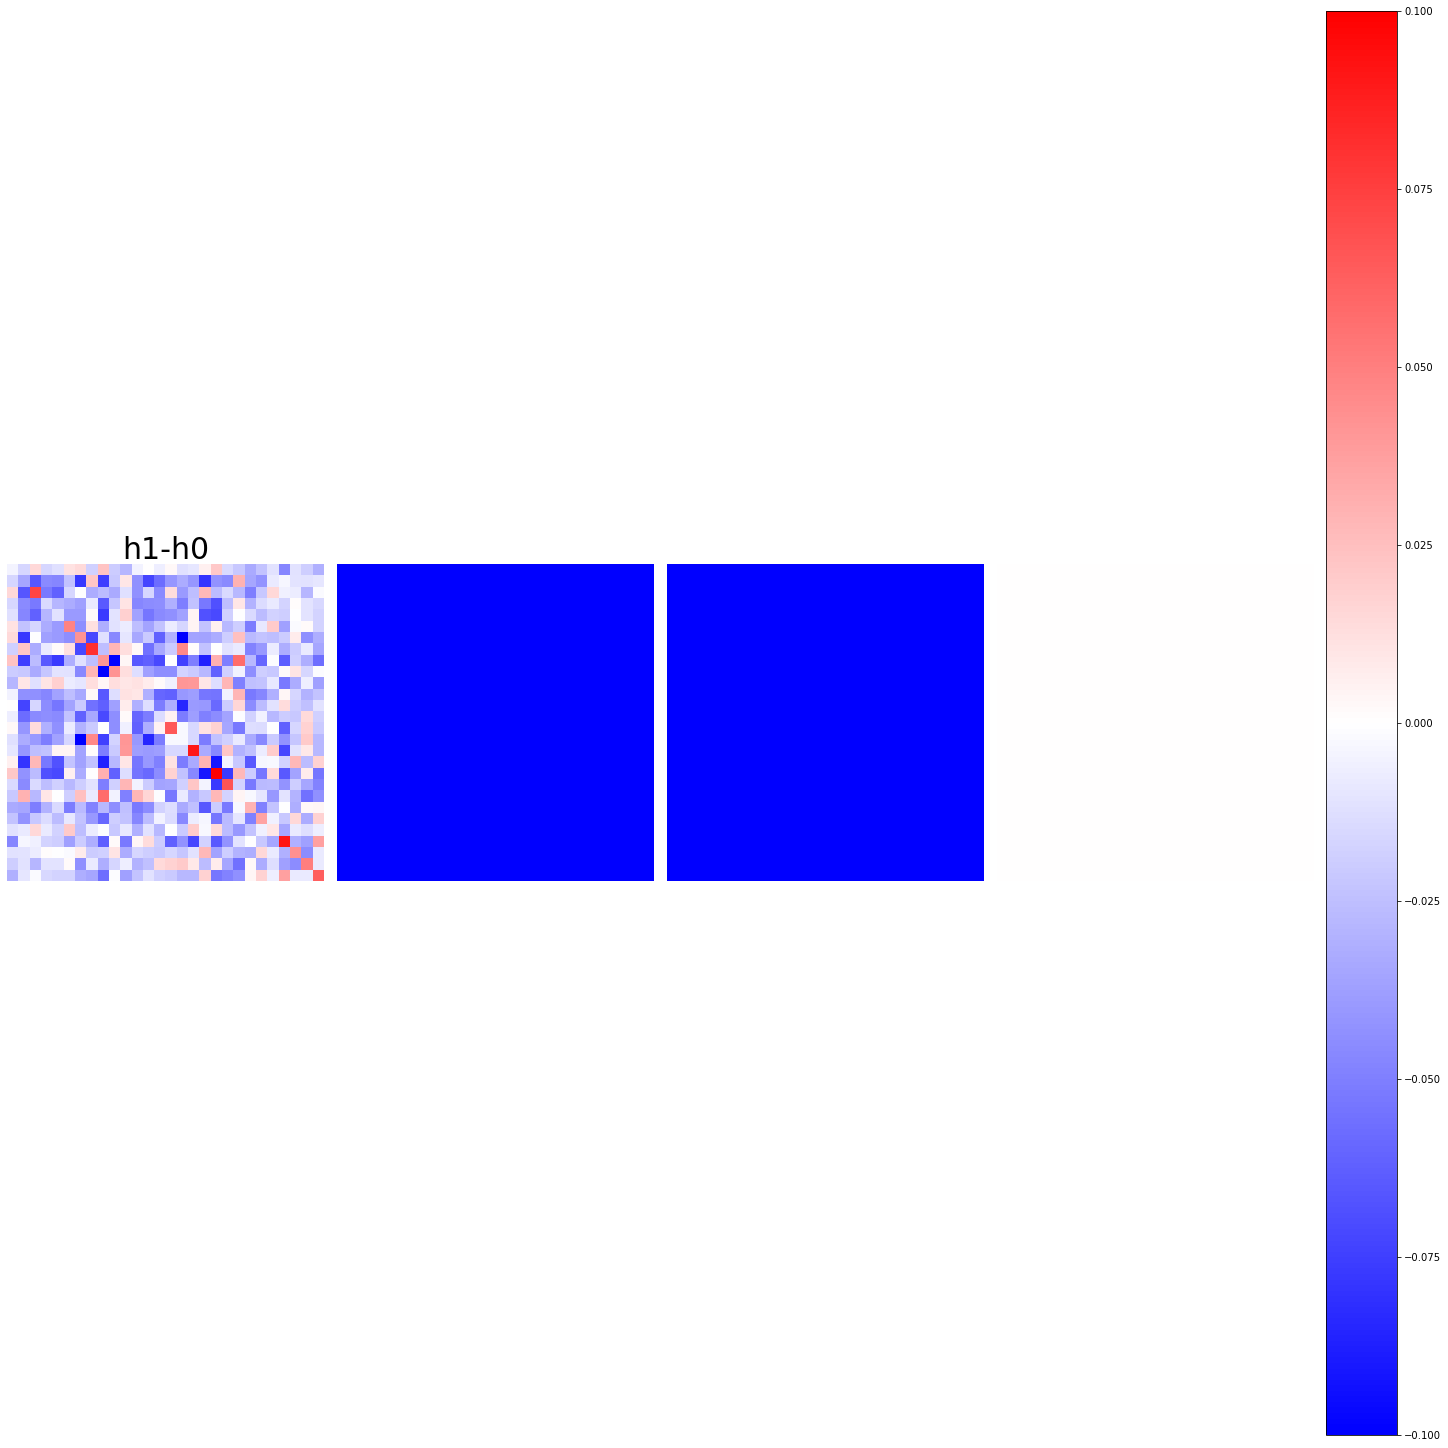

<Figure size 432x288 with 0 Axes>

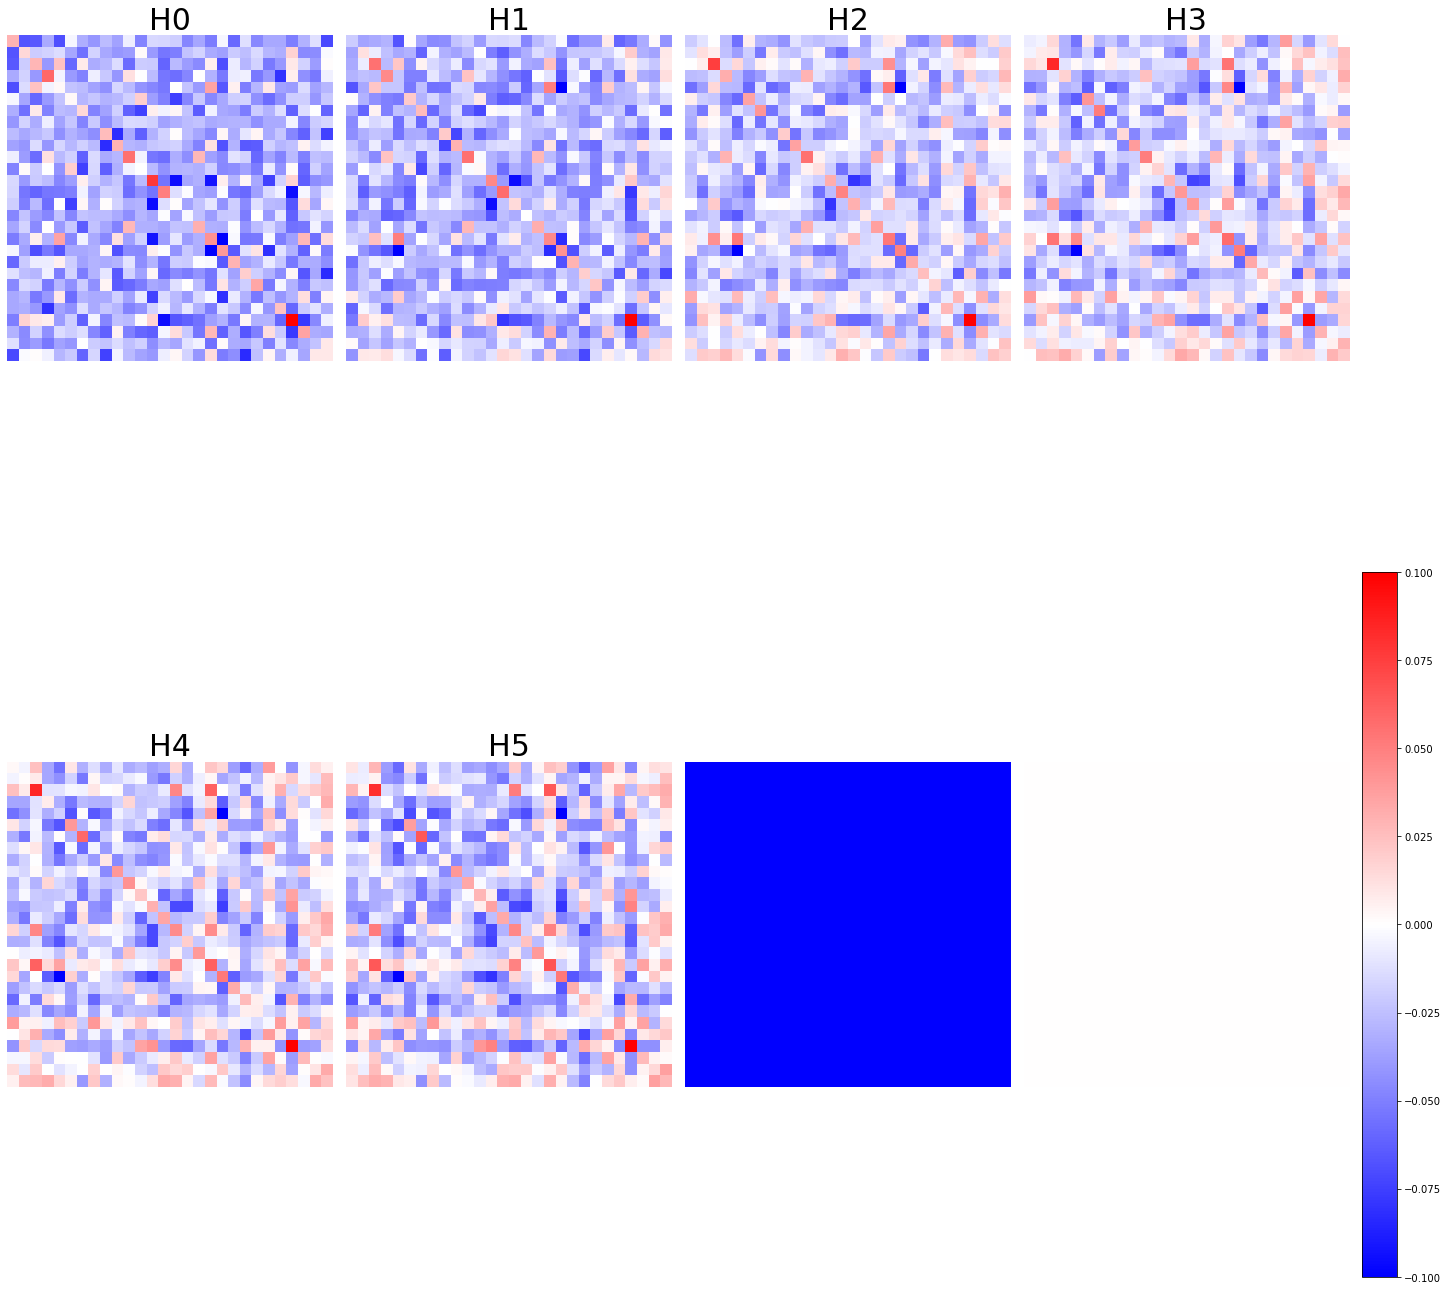

<Figure size 432x288 with 0 Axes>

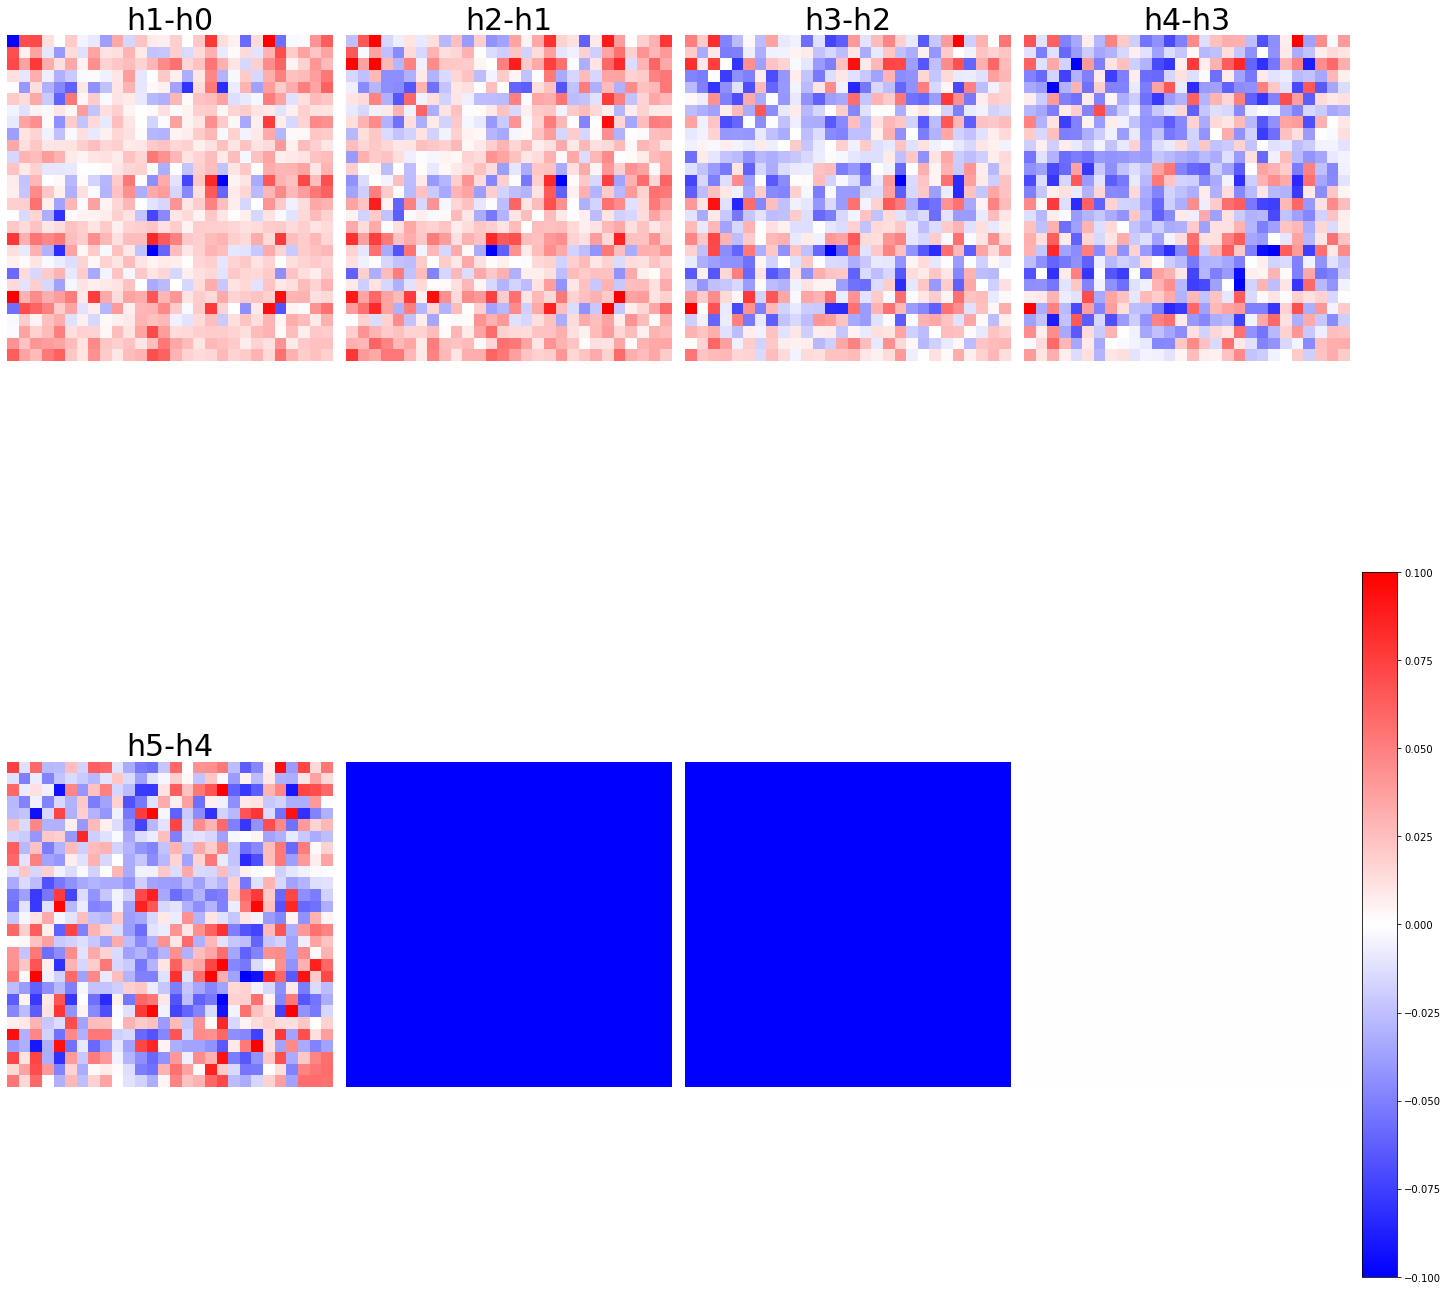

In [32]:
FP.sim_progression(M2, dm, Araw, 'model_2')

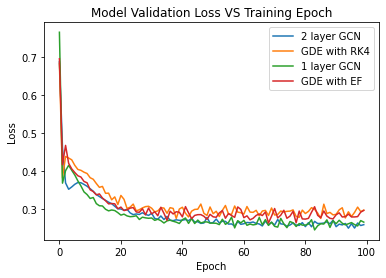

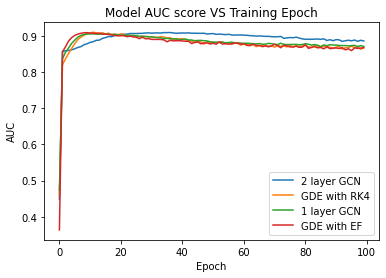

In [34]:
labels = ["2 layer GCN", "GDE with RK4","1 layer GCN", "GDE with EF"]
FP.training_curve_MLP([M1, M2], labels, cap=100)